# Procedural generation

A notebook for poking at procedural generation techniques.

In [ ]:
# imports
import random
import typing

import numpy
import matplotlib.pyplot
import opensimplex


In [ ]:
# render output

def render(
    callback: typing.Callable[[], numpy.ndarray[tuple[int, int], numpy.uint8]],
    colormap: typing.Optional[str] = "binary_r",
) -> None:
    _, axis = matplotlib.pyplot.subplots()

    data = callback()

    shape = data.shape
    if len(shape) >= 2:
        for x in range(shape[0]):
            data[x, 0] = 0
            data[x, shape[1] - 1] = 0

        for y in range(shape[1]):
            data[0, y] = 0
            data[shape[0] - 1, y] = 0

    matplotlib.pyplot.cla()

    axis.set_xticklabels([])
    axis.set_yticklabels([])
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_aspect('equal')
    axis.spines[["top", "right", "bottom", "left"]].set_visible(False)

    axis.imshow(data, cmap=colormap)


In [ ]:
# constants

width = 200
height = 200

AIR = 1
WALL = 0


def get_seed() -> int:
    return random.randint(0, 2 ** 64 - 1)


## Random Choice

This example selects tiles to carve out at random. It is the most simple example of a
procedurally generated map, but its result is chaotic and not interesting at all.

Overall this is not a viable strategy.

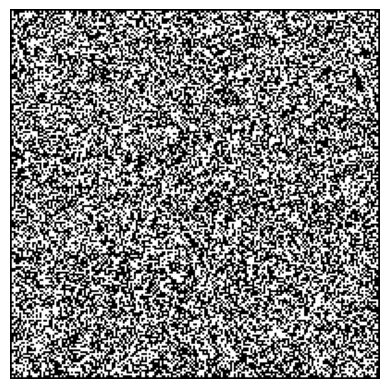

In [ ]:
def generate_random() -> numpy.ndarray[tuple[int, int], numpy.uint8]:
    seed = get_seed()
    ratio = 0.5

    result = numpy.full((height, width), WALL, dtype=numpy.uint8)

    generator = random.Random(seed)

    for x in range(width):
        for y in range(height):
            if generator.random() <= ratio:
                result[y, x] = AIR

    return result


render(generate_random)


## Simplex Noise

Simplex noise is a type of gradient noise, by rounding the noise values to the nearest
integer, we get a random map that has smooth, organic looking edges.

The downside is that the carved out areas are not contiguous, which makes the strategy
unviable on its own, but could potentially be combined with some form of tunnel carving
to provide a viable map.

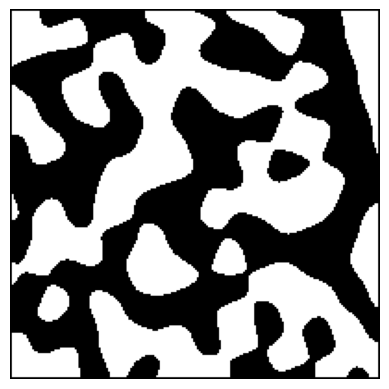

In [ ]:
def generate_simplex() -> numpy.ndarray[tuple[int, int], numpy.uint8]:
    seed = get_seed()

    scale = 0.05

    result = numpy.full((height, width), WALL, dtype=numpy.uint8)

    generator = opensimplex.OpenSimplex(seed)

    for x in range(width):
        for y in range(height):
            if generator.noise2(x * scale, y * scale) > 0:
                result[y, x] = AIR

    return result


render(generate_simplex)
